# Initialization of the dataset processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mgmt/mgmt.csv')
print(features.shape)
print(features.describe(),'\n')
print(features.head(10))

(14, 5)
       Protocol Data_size   Dest_Port   Dest_IP Mgmt_traffic
count        14        14          14        14           14
unique        3         3           2         2            2
top         TCP      Mild  Well-known  Internal          Yes
freq          5         6           7         8            9 

  Protocol Data_size   Dest_Port   Dest_IP Mgmt_traffic
0      TCP     Large  Well-known  Internal           No
1      TCP     Large  Well-known  External           No
2     ICMP     Large  Well-known  Internal          Yes
3      UDP      Mild  Well-known  Internal          Yes
4      UDP       Low       Other  Internal          Yes
5      UDP       Low       Other  External           No
6     ICMP       Low       Other  External          Yes
7      TCP      Mild  Well-known  Internal           No
8      TCP       Low       Other  Internal          Yes
9      UDP      Mild       Other  Internal          Yes


In [4]:
labels =  features['Mgmt_traffic']
features = features.drop(['Mgmt_traffic'],axis=1)

print(features.describe(),'\n')
print(labels.describe(),'\n')

       Protocol Data_size   Dest_Port   Dest_IP
count        14        14          14        14
unique        3         3           2         2
top         TCP      Mild  Well-known  Internal
freq          5         6           7         8 

count      14
unique      2
top       Yes
freq        9
Name: Mgmt_traffic, dtype: object 



# Classification via DT

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [6]:
features_binary = pd.get_dummies(features,drop_first=True)
#features_binary = pd.get_dummies(features)

print(features_binary.shape)
print(features_binary.describe(),'\n')

dummy_variables = list(features_binary)
print(dummy_variables)

label_binary = pd.get_dummies(labels)
dummy_labels = list(label_binary)
print(dummy_labels)

(14, 6)
       Protocol_TCP Protocol_UDP Data_size_Low Data_size_Mild  \
count            14           14            14             14   
unique            2            2             2              2   
top           False        False         False          False   
freq              9            9            10              8   

       Dest_Port_Well-known Dest_IP_Internal  
count                    14               14  
unique                    2                2  
top                    True             True  
freq                      7                8   

['Protocol_TCP', 'Protocol_UDP', 'Data_size_Low', 'Data_size_Mild', 'Dest_Port_Well-known', 'Dest_IP_Internal']
['No', 'Yes']


In [7]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=40)
classifier.fit(features_binary.values,labels)

DecisionTreeClassifier(criterion='entropy', random_state=40)

In [8]:
text_representation = tree.export_text(classifier, feature_names=dummy_variables,  decimals=1)
print(text_representation)

|--- Dest_Port_Well-known <= 0.5
|   |--- Protocol_UDP <= 0.5
|   |   |--- class: Yes
|   |--- Protocol_UDP >  0.5
|   |   |--- Dest_IP_Internal <= 0.5
|   |   |   |--- class: No
|   |   |--- Dest_IP_Internal >  0.5
|   |   |   |--- class: Yes
|--- Dest_Port_Well-known >  0.5
|   |--- Protocol_TCP <= 0.5
|   |   |--- Protocol_UDP <= 0.5
|   |   |   |--- class: Yes
|   |   |--- Protocol_UDP >  0.5
|   |   |   |--- Dest_IP_Internal <= 0.5
|   |   |   |   |--- class: No
|   |   |   |--- Dest_IP_Internal >  0.5
|   |   |   |   |--- class: Yes
|   |--- Protocol_TCP >  0.5
|   |   |--- class: No



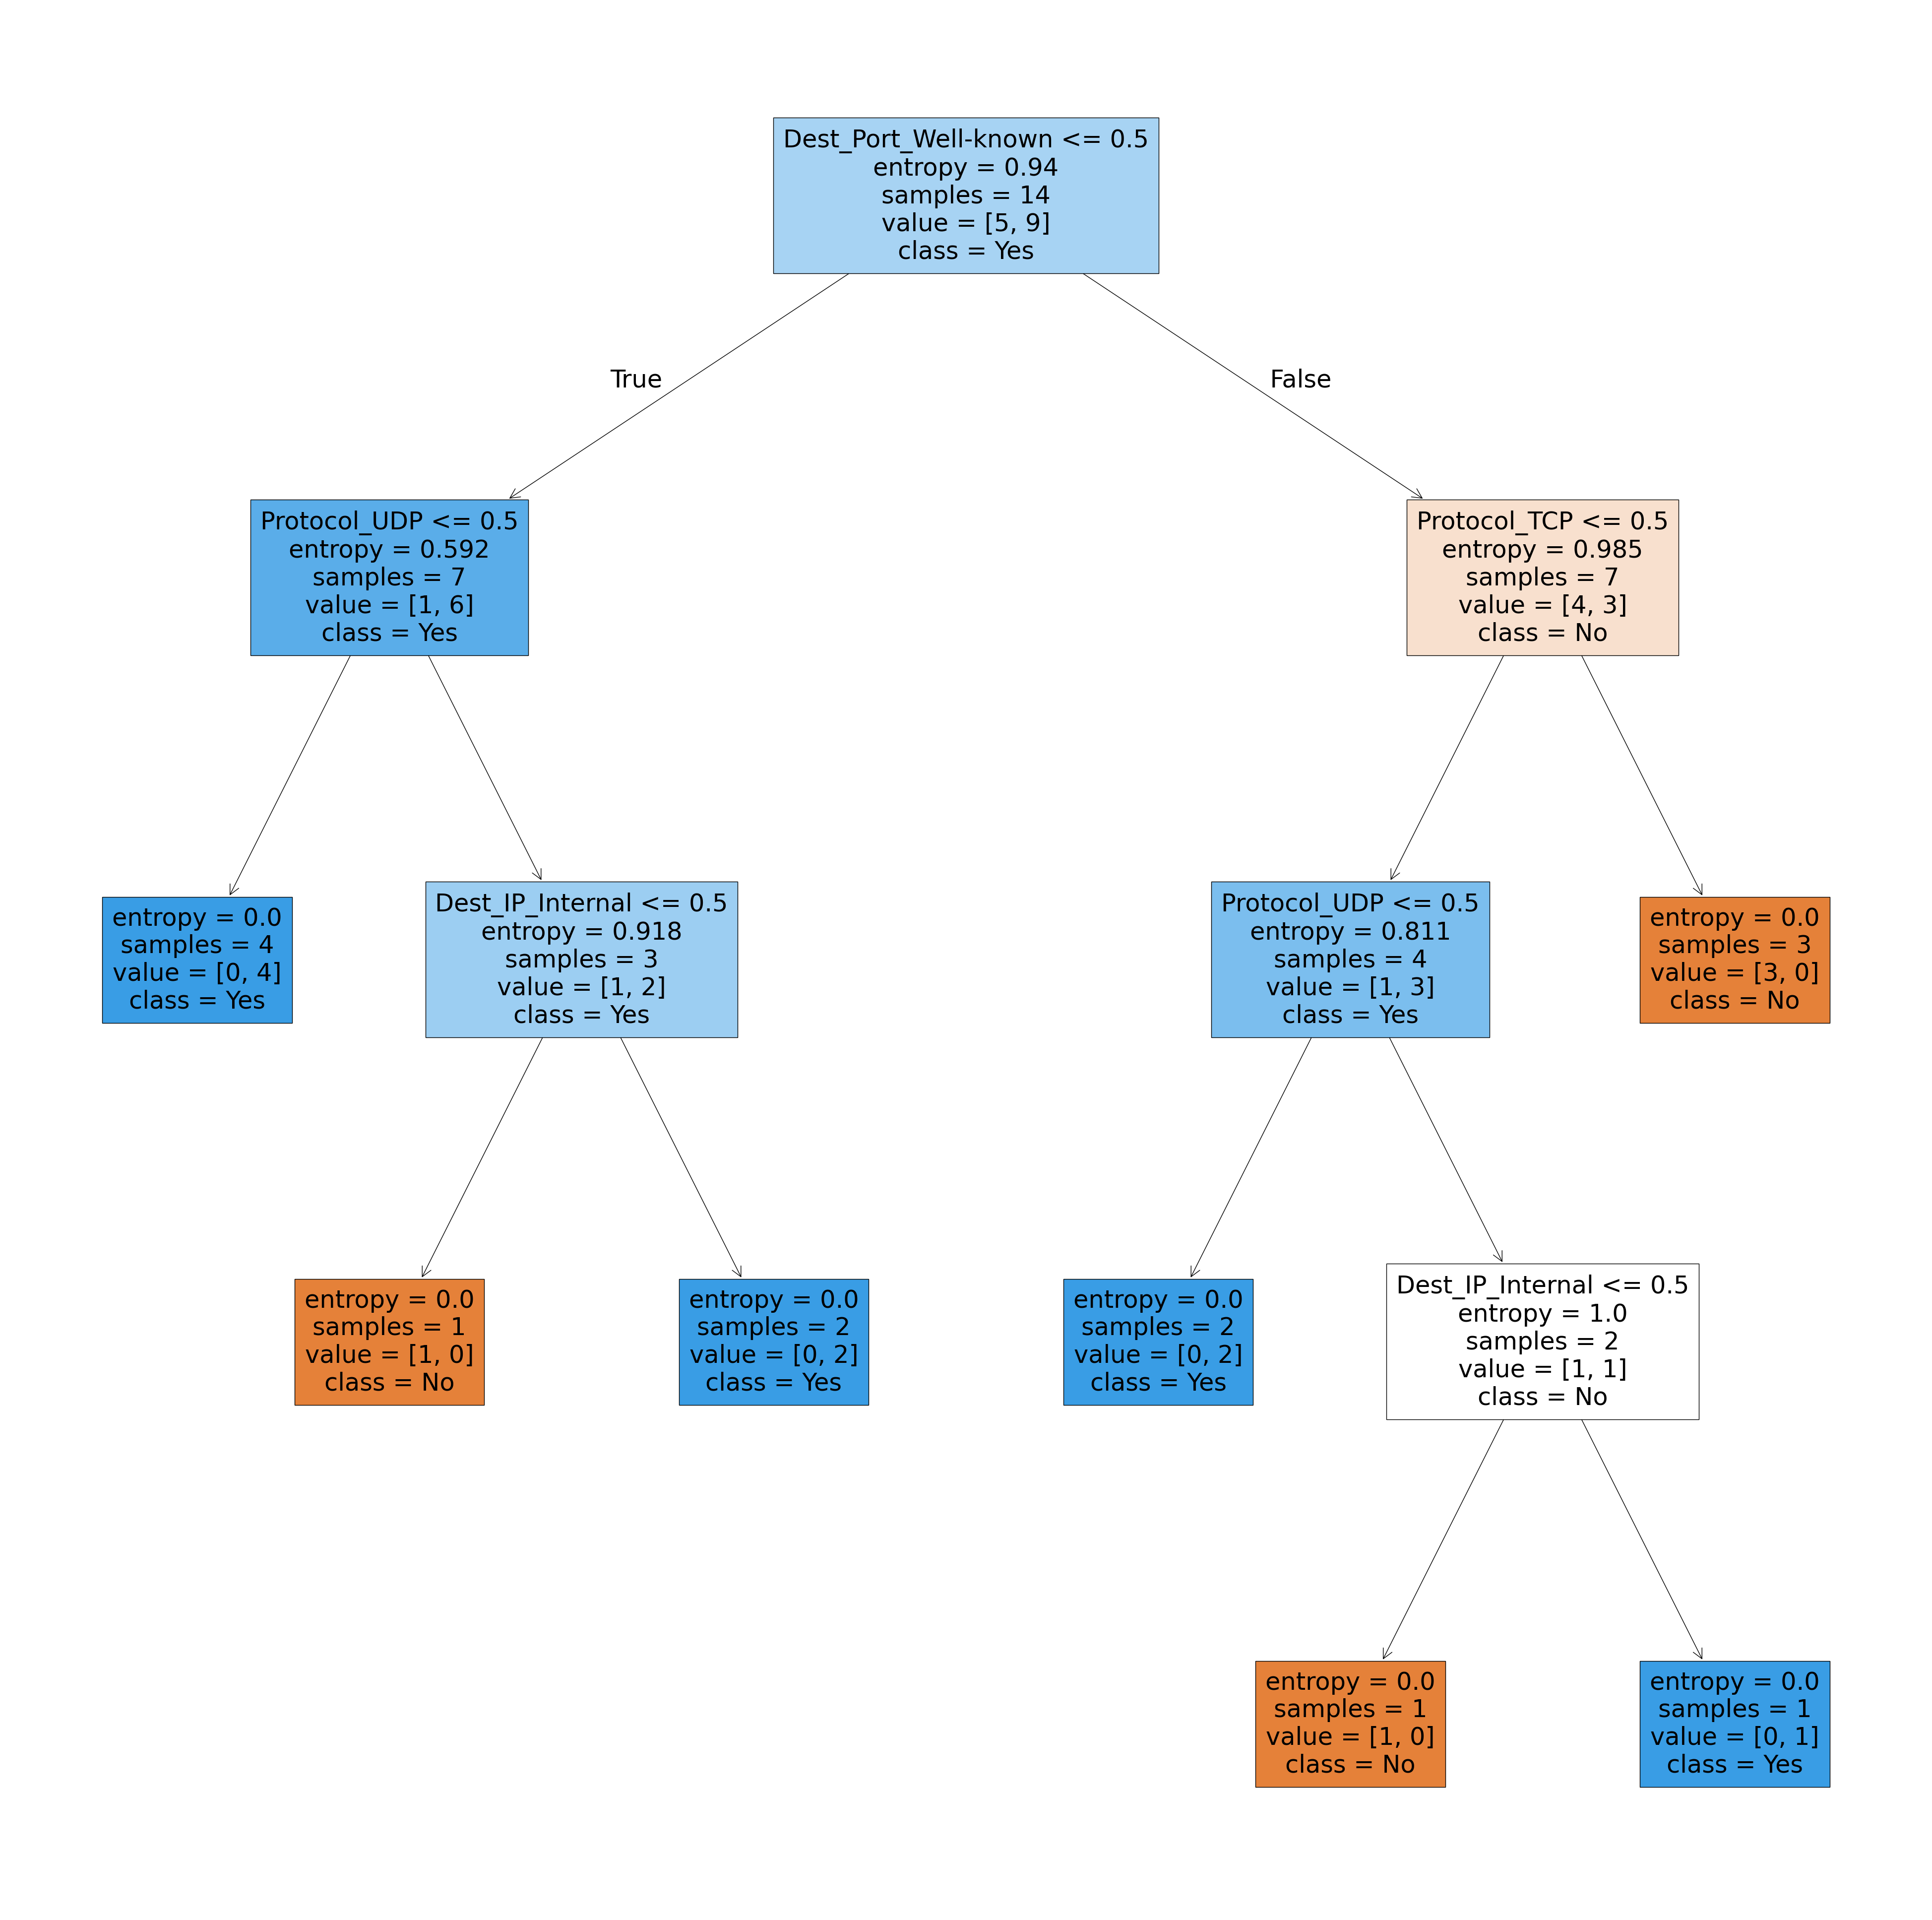

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier, feature_names=dummy_variables,  class_names=dummy_labels, filled=True)

In [10]:
print(dummy_variables)

['Protocol_TCP', 'Protocol_UDP', 'Data_size_Low', 'Data_size_Mild', 'Dest_Port_Well-known', 'Dest_IP_Internal']


In [11]:
istanze = [['TCP','Mild','Other','Internal'],['ICMP','Mild','Other','External'],['UDP','Low','Other','External']]
istanze_bin = np.array([[1, 0, 0, 1, 0, 1],[0, 0, 0, 1, 0, 0],[0, 1, 1, 0, 0, 0]]).reshape(3,-1)
print(istanze_bin)

[[1 0 0 1 0 1]
 [0 0 0 1 0 0]
 [0 1 1 0 0 0]]


In [12]:
classificazione_istanza =  classifier.predict(istanze_bin)
print(classificazione_istanza)

['Yes' 'Yes' 'No']


In [13]:
# Modalità alternativa: fondo le istanze con il dataset e poi le scorporo
# Recupero l'intestazione
data_top = features.columns
print(data_top,'\n\n')
istanze_df=pd.DataFrame(istanze, columns=data_top)
print(istanze_df,'\n')
# Aggiungo i nomi delle colonne per fondere i 2 dataframe
temp_dataset=pd.concat([features,istanze_df],ignore_index=True)
print(temp_dataset,'\n')
#Trasformo con OneHot encoding
new_dummies=pd.get_dummies(temp_dataset,drop_first=True)
print(new_dummies,'\n')

#Stacco le ultime righe del dataset, correttamente codificate
istanze_dummies=new_dummies[len(features):]
print(istanze_dummies,'\n')

ist_np=np.array(istanze_dummies)
print(ist_np,'\n')

Index(['Protocol', 'Data_size', 'Dest_Port', 'Dest_IP'], dtype='object') 


  Protocol Data_size Dest_Port   Dest_IP
0      TCP      Mild     Other  Internal
1     ICMP      Mild     Other  External
2      UDP       Low     Other  External 

   Protocol Data_size   Dest_Port   Dest_IP
0       TCP     Large  Well-known  Internal
1       TCP     Large  Well-known  External
2      ICMP     Large  Well-known  Internal
3       UDP      Mild  Well-known  Internal
4       UDP       Low       Other  Internal
5       UDP       Low       Other  External
6      ICMP       Low       Other  External
7       TCP      Mild  Well-known  Internal
8       TCP       Low       Other  Internal
9       UDP      Mild       Other  Internal
10      TCP      Mild       Other  External
11     ICMP      Mild  Well-known  External
12     ICMP     Large       Other  Internal
13      UDP      Mild  Well-known  External
14      TCP      Mild       Other  Internal
15     ICMP      Mild       Other  External
16      UD

In [14]:
classificazione_istanza_metodo2 =  classifier.predict(ist_np)
print(classificazione_istanza_metodo2,'\n')

['Yes' 'Yes' 'No'] 



# Modified Dataset

In [15]:
features_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mgmt/mgmt_more.csv')
print(features_2.shape)
print(features_2.describe(),'\n')
print(features_2.head(15))

(15, 5)
       Protocol Data_size Dest_Port   Dest_IP Mgmt_traffic
count        15        15        15        15           15
unique        3         3         2         2            2
top         TCP      Mild     Other  Internal          Yes
freq          6         6         8         8            9 

   Protocol Data_size   Dest_Port   Dest_IP Mgmt_traffic
0       TCP     Large  Well-known  Internal           No
1       TCP     Large  Well-known  External           No
2      ICMP     Large  Well-known  Internal          Yes
3       UDP      Mild  Well-known  Internal          Yes
4       UDP       Low       Other  Internal          Yes
5       UDP       Low       Other  External           No
6      ICMP       Low       Other  External          Yes
7       TCP      Mild  Well-known  Internal           No
8       TCP       Low       Other  Internal          Yes
9       UDP      Mild       Other  Internal          Yes
10      TCP      Mild       Other  External          Yes
11     ICMP

In [16]:
labels2 = features_2['Mgmt_traffic']
features_2 = features_2.drop(['Mgmt_traffic'],axis=1)
print(features_2.describe(),'\n')

       Protocol Data_size Dest_Port   Dest_IP
count        15        15        15        15
unique        3         3         2         2
top         TCP      Mild     Other  Internal
freq          6         6         8         8 



In [17]:
features_2_binary = pd.get_dummies(features_2, drop_first=True)
#features_binary = pd.get_dummies(features)
print(features_2_binary.shape)
print(features_2_binary.describe(),'\n')

dummy_variables_2 = list(features_2_binary)
print(dummy_variables_2)

(15, 6)
       Protocol_TCP Protocol_UDP Data_size_Low Data_size_Mild  \
count            15           15            15             15   
unique            2            2             2              2   
top           False        False         False          False   
freq              9           10            11              9   

       Dest_Port_Well-known Dest_IP_Internal  
count                    15               15  
unique                    2                2  
top                   False             True  
freq                      8                8   

['Protocol_TCP', 'Protocol_UDP', 'Data_size_Low', 'Data_size_Mild', 'Dest_Port_Well-known', 'Dest_IP_Internal']


In [18]:
classifier2 = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier2.fit(features_2_binary.values,labels2)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
text_representation_2 = tree.export_text(classifier2, feature_names=dummy_variables_2,decimals=1)
print(text_representation_2)

|--- Protocol_TCP <= 0.5
|   |--- Dest_IP_Internal <= 0.5
|   |   |--- Protocol_UDP <= 0.5
|   |   |   |--- class: Yes
|   |   |--- Protocol_UDP >  0.5
|   |   |   |--- class: No
|   |--- Dest_IP_Internal >  0.5
|   |   |--- class: Yes
|--- Protocol_TCP >  0.5
|   |--- Dest_Port_Well-known <= 0.5
|   |   |--- Data_size_Mild <= 0.5
|   |   |   |--- Data_size_Low <= 0.5
|   |   |   |   |--- class: No
|   |   |   |--- Data_size_Low >  0.5
|   |   |   |   |--- class: Yes
|   |   |--- Data_size_Mild >  0.5
|   |   |   |--- class: Yes
|   |--- Dest_Port_Well-known >  0.5
|   |   |--- class: No



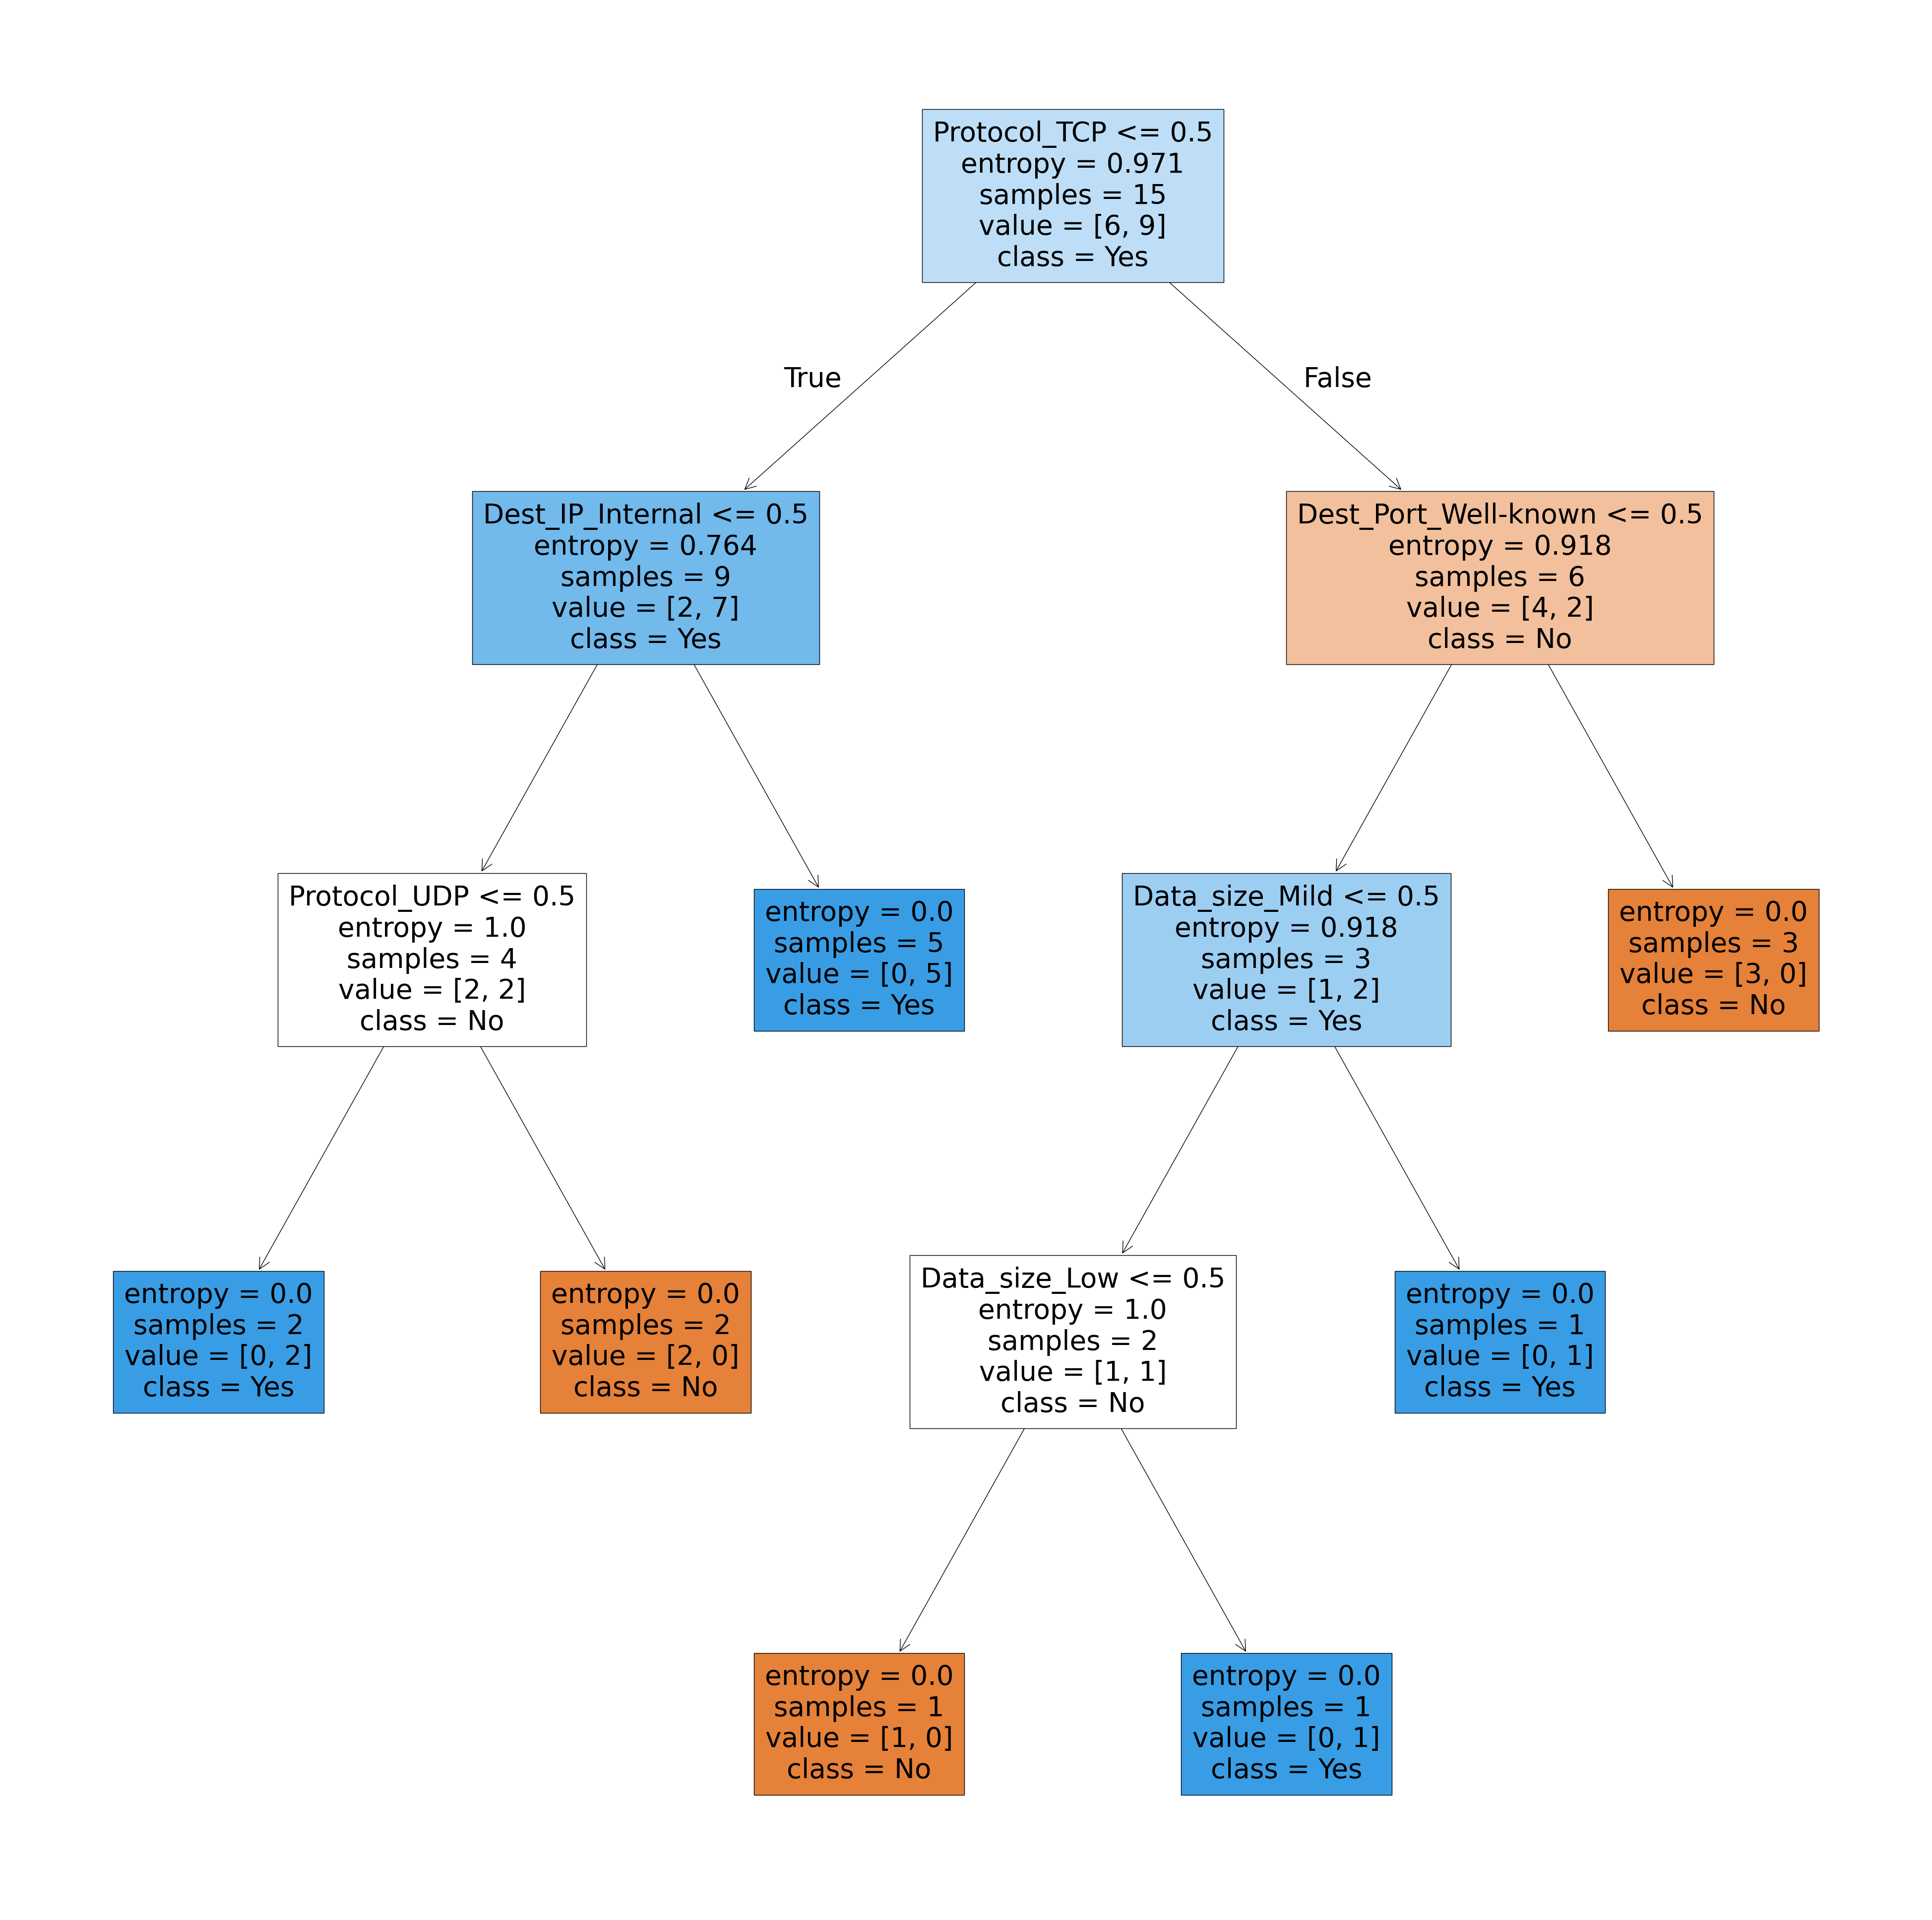

In [20]:
import matplotlib.pyplot as plt
fig2 = plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier2, feature_names=dummy_variables_2,  class_names=dummy_labels, filled=True)

In [21]:
classificazione_istanze_2 =  classifier2.predict(istanze_bin)
print(classificazione_istanze_2)

['Yes' 'Yes' 'No']
